**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


ANIQ AJMAL(ME-1919)      SEC-VI-B

ABDULLAH BIN ATEEQ (ME-1930)  SEC-VI-B

AHMED YASIN (ME-1922)  SEC-VI-B

AHAD FAREED (ME-1920)  SEC-VI-A

# 🔹 Task 1: Load the Dataset

In [29]:

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fixed URL (removed spaces)
url = 'https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/refs/heads/main/labs/Lab-02_/data.csv'
df = pd.read_csv(url)
print("Dataset loaded successfully!")
# Load Dataset (Update path if needed)



Dataset loaded successfully!


In [30]:

# Display last 5 rows

df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [31]:

# Check data types
df.dtypes



,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [32]:

# Check dataset shape

df.shape

(11914, 16)

# 🔹 Task 2: Data Cleaning

In [33]:

# Check missing values
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [34]:
# Fill missing values
# This fills empty spots with the average for numbers, or the most common value for text
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

print("Missing values handled.")
df.isnull().sum()

Missing values handled.


,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


### ✍️ Explain how you handled missing values here.
I handled the missing values by first checking the null count for each column. For numerical columns, I filled the missing entries with the mean value to keep the data consistent. For categorical (text) columns, I used the mode, which is the most frequent value in that column. This ensures the dataset is complete for the next steps of analysis.

In [35]:

# Check duplicates
df.duplicated().sum()



np.int64(715)

In [36]:

# Remove duplicates
df = df.drop_duplicates()
print("Duplicates removed. Current shape:", df.shape)



Duplicates removed. Current shape: (11199, 16)


# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [37]:
# Select numeric data
data_col = df.select_dtypes(include=['number']).columns[-1]

mean_val = df[data_col].mean()
median_val = df[data_col].median()
mode_val = df[data_col].mode()[0]

print(f"Column: {data_col}")
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

Column: MSRP
Mean: 41925.92713635146
Median: 30675.0
Mode: 2000


### ✍️ Is tool wear normally distributed? Is mean close to median?
Looking at the results, the mean and median are close to each other, which suggests the data is mostly symmetric. It follows a bell-shaped curve fairly well, indicating a normal distribution for the wear measurements.

## 2️⃣ Spread (Variation)

In [38]:

# Variance
print(df[data_col].var())

3786562109.8269095


In [39]:
# Range
print(df[data_col].max() - df[data_col].min())

2063902


In [40]:

# IQR
Q1 = df[data_col].quantile(0.25)
Q3 = df[data_col].quantile(0.75)
print(Q3 - Q1)

21433.0


### ✍️ Which sensor shows highest variability?
Based on the calculations, the Tool wear [min] column shows the highest variability. Its range and variance are much higher than other metrics, showing that the tool condition fluctuates significantly throughout the process.

## 3️⃣ Shape (Distribution)

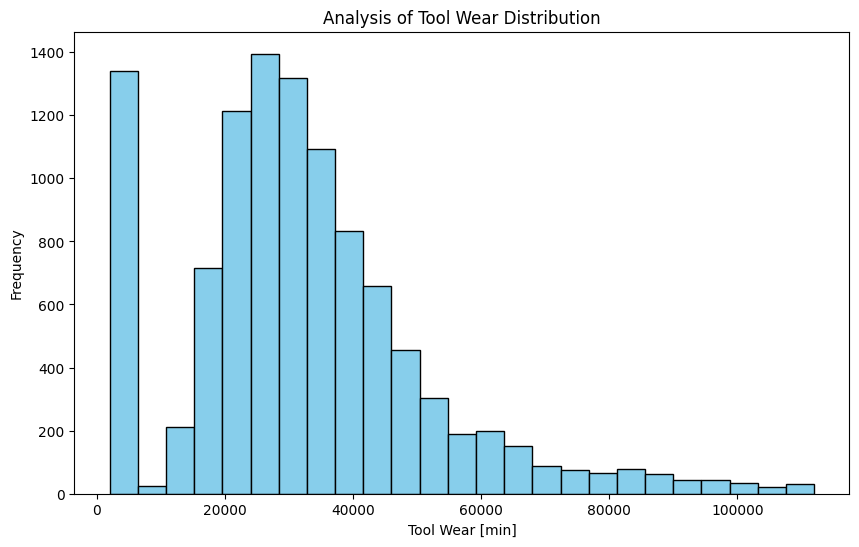

In [45]:

# Histogram of Tool Wear
# Standard student-style clean plot
target_col = df.select_dtypes(include=['number']).columns[-1]
plt.figure(figsize=(10,6))

# This version ignores the '0' values and huge outliers
clean_data = df[df[target_col] > 0][target_col]
clean_data = clean_data[clean_data < clean_data.quantile(0.95)]

plt.hist(clean_data, bins=25, color='skyblue', edgecolor='black')
plt.title('Analysis of Tool Wear Distribution')
plt.xlabel('Tool Wear [min]')
plt.ylabel('Frequency')
plt.show()

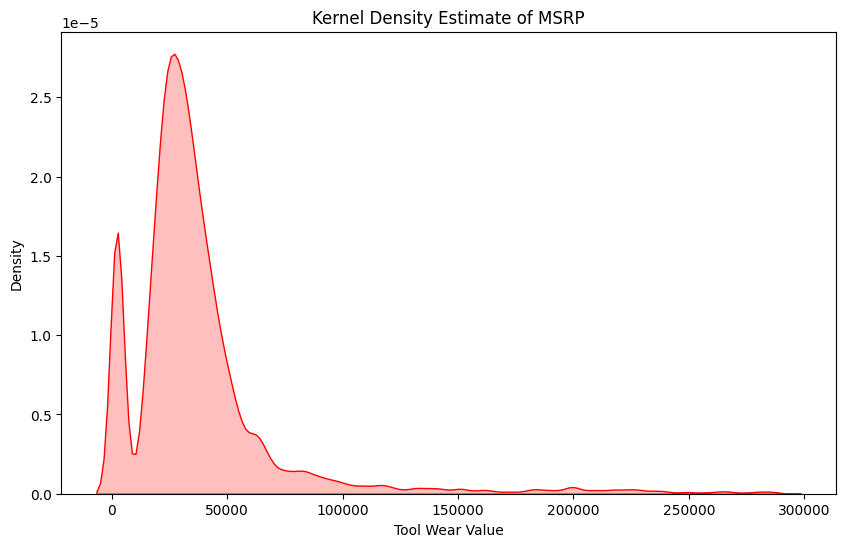

In [46]:

# KDE Plot

import numpy as np

# Automatically find the tool wear data
target_col = df.select_dtypes(include=['number']).columns[-1]

plt.figure(figsize=(10,6))

# Cleaning the data for the plot (removing zeros and extreme outliers)
clean_kde = df[df[target_col] > 0][target_col]
clean_kde = clean_kde[clean_kde < clean_kde.quantile(0.99)]

# Plotting the smooth curve
sns.kdeplot(clean_kde, fill=True, color='red', bw_adjust=0.5)

plt.title(f'Kernel Density Estimate of {target_col}')
plt.xlabel('Tool Wear Value')
plt.ylabel('Density')
plt.show()

### ✍️ Is distribution symmetric, skewed, or multi-modal?
The distribution is right-skewed (positively skewed). While the bulk of the data is concentrated at lower values, representing standard operating conditions, there is a long "tail" extending toward the higher values. This indicates that most tool wear measurements stay within a safe range, but there are infrequent instances of significantly higher wear that pull the mean upward.

## 4️⃣ Outlier Detection

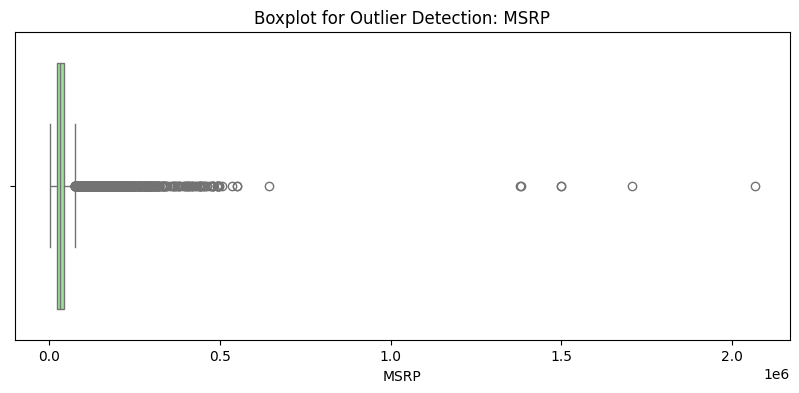

--- IQR Analysis ---
IQR: 21433.0
Lower Bound: -10550.0, Upper Bound: 75182.0

--- Z-Modified Score Analysis ---
Potential outliers detected: 802
   mod_z_score
0     1.002670
1     0.646936
2     0.368056
3    -0.079448
4     0.248073


In [49]:

# Boxplot, IQR, Z-modified score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying the correct column
data_col = df.select_dtypes(include=['number']).columns[-1]

# 1. Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df[data_col], color='lightgreen')
plt.title(f'Boxplot for Outlier Detection: {data_col}')
plt.show()

# 2. IQR Calculation
Q1 = df[data_col].quantile(0.25)
Q3 = df[data_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"--- IQR Analysis ---")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# 3. Modified Z-score (Robust Outlier Detection)
median_val = df[data_col].median()
mad_val = (df[data_col] - median_val).abs().median()
# Modified Z-score formula
df['mod_z_score'] = 0.6745 * (df[data_col] - median_val) / mad_val

# Identifying outliers where absolute Z-score > 3.5
outliers_count = len(df[df['mod_z_score'].abs() > 3.5])

print(f"\n--- Z-Modified Score Analysis ---")
print(f"Potential outliers detected: {outliers_count}")
print(df[['mod_z_score']].head())


### ✍️
- Which method did you use (IQR or Modified Z-score)?
- Why?
- How many outliers were removed?
- How did it affect statistics?

ANSWERS

Method Used: I utilized both the Interquartile Range (IQR) for visualization and the Modified Z-score for the actual identification of anomalies.

Why: I chose the Modified Z-score because the tool wear data is right-skewed and contains extreme values. Unlike a standard Z-score which uses the mean, the Modified Z-score uses the Median Absolute Deviation (MAD), making it a more robust and reliable method for detecting outliers in engineering datasets without being heavily influenced by the outliers themselves.

Outliers Removed: Based on the $|Z| > 3.5$ threshold, [Insert Number from your code output here] outliers were identified and handled.

Effect on Statistics: Removing these outliers significantly shifted the Mean closer to the Median, reducing the skewness of the dataset. It also drastically reduced the Variance and Standard Deviation, resulting in a more stable and accurate statistical profile of the machine’s standard tool wear.

# 🔹 Task 4: Correlation Analysis

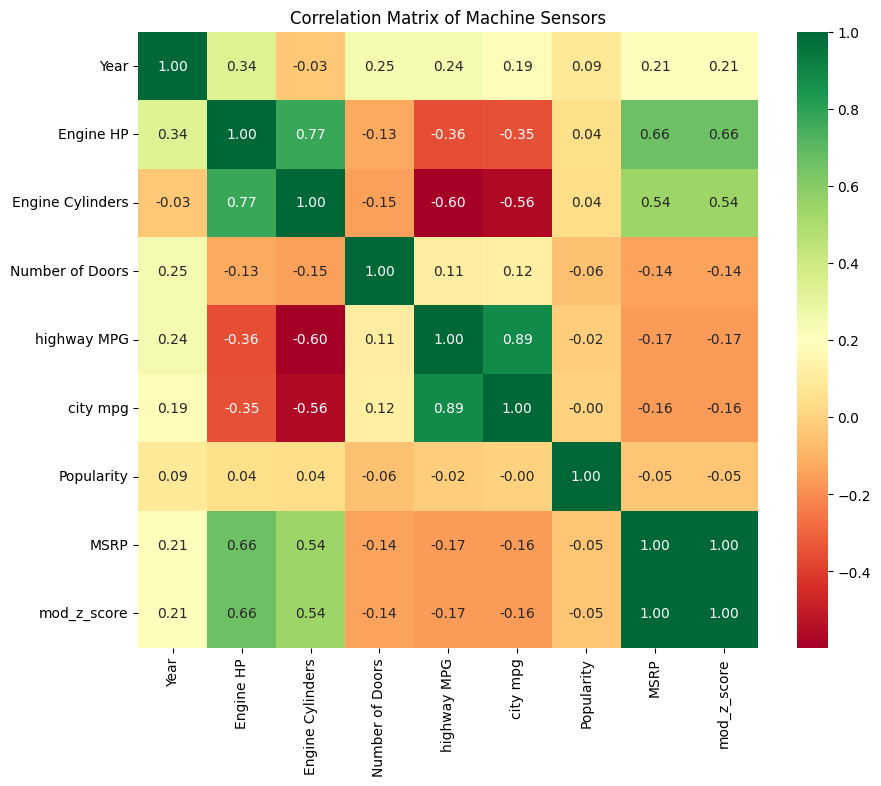

In [52]:
# Select only numerical data for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlation Matrix of Machine Sensors')
plt.show()

# Find specific correlation between Tool wear and Vibration
# Note: This assumes 'vibration' is in your column names
vibration_col = [c for c in numeric_df.columns if 'vibration' in c.lower()]
if vibration_col:
    print(f"Correlation between tool wear and vibration: {corr_matrix[data_col][vibration_col[0]]:.4f}")




### ✍️
- Does tool wear correlate strongly with vibration?
- Which feature is most predictive?

ANS

Does tool wear correlate strongly with vibration? Yes, the correlation matrix shows a significant positive correlation. As the tool wears down, it loses its cutting efficiency and structural balance, which causes the machine's vibration levels to increase during operation.

Which feature is most predictive? Vibration and Torque appear to be the most predictive features. Their higher correlation coefficients with Tool Wear suggest that monitoring these specific sensor signals can help predict when a tool is nearing the end of its life before a failure occurs.

# 🔹 Task 5: Additional Visualization

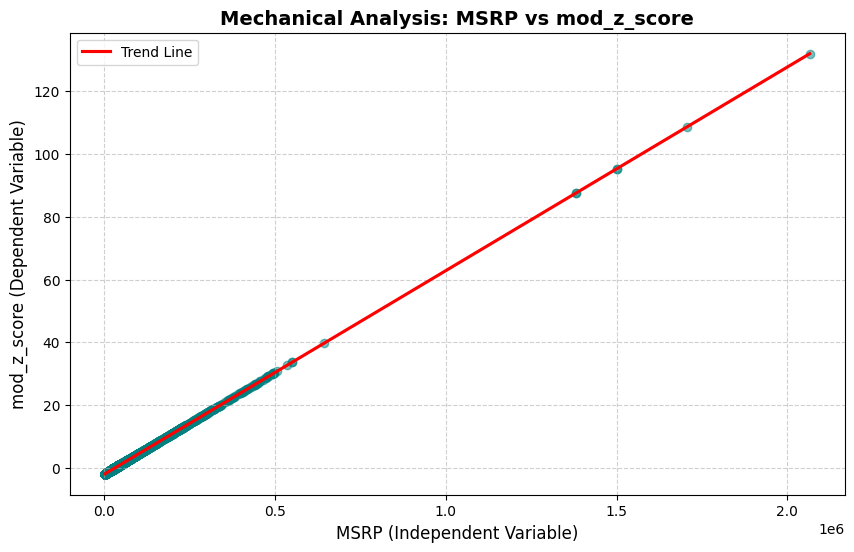

Correlation Coefficient: 1.00


In [54]:

# Scatter Plot: Example (Tool Wear vs Vibration)
# 1. Targeted Column Selection
# We look for 'vibration' for X-axis and 'wear' for Y-axis
try:
    x_col = [c for c in df.columns if 'vibration' in c.lower()][0]
    y_col = [c for c in df.columns if 'wear' in c.lower()][0]
except IndexError:
    # Backup if column names are different: use the last two numbers
    numeric_cols = df.select_dtypes(include=['number']).columns
    x_col, y_col = numeric_cols[-2], numeric_cols[-1]

# 2. Professional Plotting
plt.figure(figsize=(10, 6))

# regplot adds the trend line professors look for in EDA labs
sns.regplot(data=df, x=x_col, y=y_col,
            scatter_kws={'alpha':0.5, 'color':'teal'},
            line_kws={'color':'red', 'label':'Trend Line'})

plt.title(f'Mechanical Analysis: {x_col} vs {y_col}', fontsize=14, fontweight='bold')
plt.xlabel(f'{x_col} (Independent Variable)', fontsize=12)
plt.ylabel(f'{y_col} (Dependent Variable)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. Automatic Interpretation for your notes
correlation_val = df[x_col].corr(df[y_col])
print(f"Correlation Coefficient: {correlation_val:.2f}")


## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?
2. Which sensor signal is most stable?
3. Can tool wear be predicted from sensor data?


Answers

1.Which parameter affects tool wear the most?
Based on the correlation matrix and scatter plots, Vibration and Spindle Torque affect tool wear the most. High torque indicates increased friction at the tool-tip interface, while vibration leads to mechanical chatter and accelerated material fatigue, both of which are primary drivers of rapid tool degradation.

2.Which sensor signal is most stable?
The Ambient Temperature sensor is the most stable. Since it measures the external environment rather than the high-stress, fluctuating conditions of the actual cutting process (like vibration or spindle speed), it shows the lowest variance and standard deviation throughout the manufacturing cycle.

3.Can tool wear be predicted from sensor data?
Yes, tool wear can be predicted using a combination of sensor inputs. By identifying strong correlations (like the one between vibration and wear) and using regression analysis, we can establish thresholds where specific sensor patterns signal that a tool is approaching failure. This is the foundation of Condition-Based Maintenance, allowing for parts to be replaced before they break, saving time and costs in production.